**In this notebook, I will be comparing the results of the finetuned BERTweet model and the In context learning model on the SemEval 2016 dataset for the task of stance detection.**

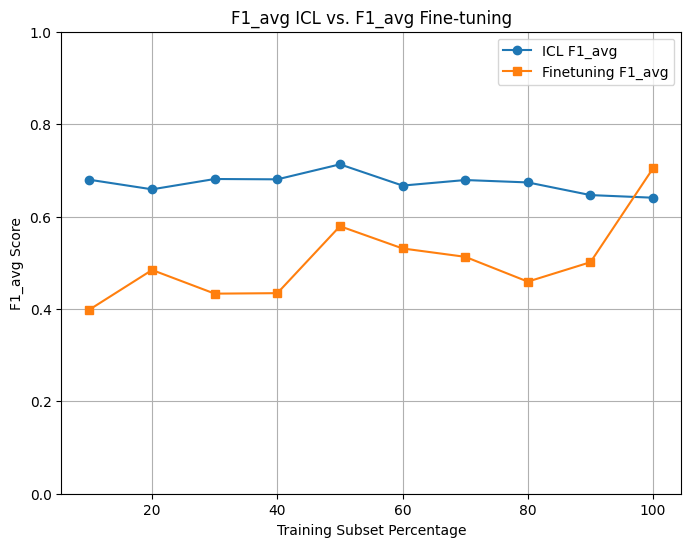

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the two results CSVs
icl_df = pd.read_csv("/content/drive/MyDrive/comps artifact/icl_results.csv")
finetune_df = pd.read_csv("/content/drive/MyDrive/comps artifact/btweet_finetuning_summary2.csv")

# 2) Plot macro-F1 for each approach
plt.figure(figsize=(8, 6))

# Sort by frac_val for consistent lines
icl_df = icl_df.sort_values("frac_val")
finetune_df = finetune_df.sort_values("fraction")

plt.plot(icl_df["frac_val"], icl_df["f_avg"], marker='o', label="ICL F1_avg")
plt.plot(finetune_df["fraction"], finetune_df["f1_avg"], marker='s', label="Finetuning F1_avg")

plt.title("F1_avg ICL vs. F1_avg Fine-tuning")
plt.xlabel("Training Subset Percentage")
plt.ylabel("F1_avg Score")
plt.ylim([0,1])
plt.grid(True)
plt.legend()
plt.show()

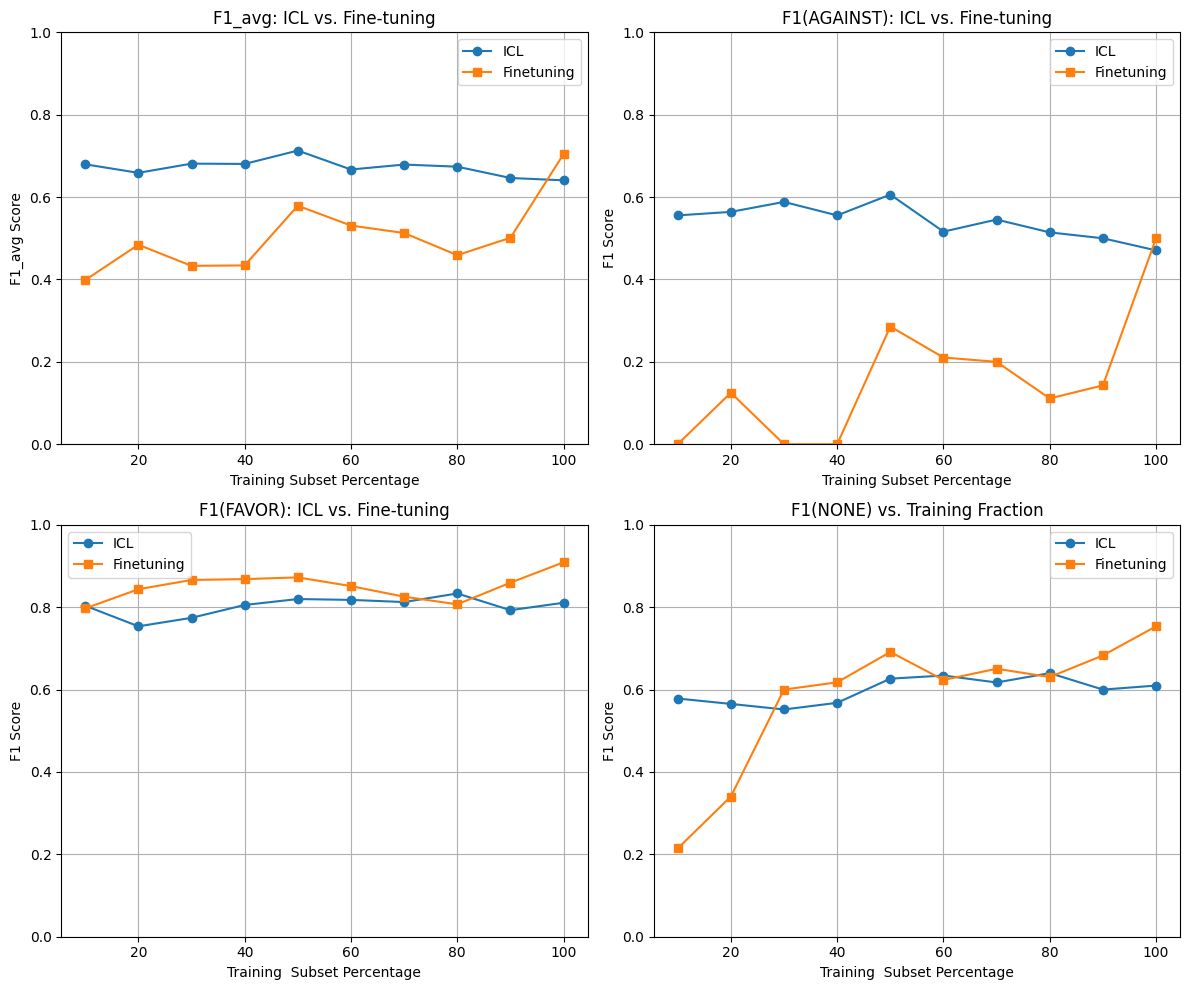

In [4]:
#Plots by label
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- Subplot 1 (top-left): F1_avg ---
axes[0, 0].plot(icl_df["frac_val"], icl_df["f_avg"], marker='o', label="ICL")
axes[0, 0].plot(finetune_df["fraction"], finetune_df["f1_avg"], marker='s', label="Finetuning")
axes[0, 0].set_title("F1_avg: ICL vs. Fine-tuning")
axes[0, 0].set_xlabel("Training Subset Percentage")
axes[0, 0].set_ylabel("F1_avg Score")
axes[0, 0].set_ylim([0,1])
axes[0, 0].grid(True)
axes[0, 0].legend()

# --- Subplot 2 (top-right): AGAINST:0 ---
axes[0, 1].plot(icl_df["frac_val"], icl_df["f1_against"], marker='o', label="ICL")
axes[0, 1].plot(finetune_df["fraction"], finetune_df["f1_label_0"], marker='s', label="Finetuning")
axes[0, 1].set_title("F1(AGAINST): ICL vs. Fine-tuning")
axes[0, 1].set_xlabel("Training Subset Percentage")
axes[0, 1].set_ylabel("F1 Score")
axes[0, 1].set_ylim([0,1])
axes[0, 1].grid(True)
axes[0, 1].legend()

# --- Subplot 3 (bottom-left): FAVOR:1 ---
axes[1, 0].plot(icl_df["frac_val"], icl_df["f1_favor"], marker='o', label="ICL")
axes[1, 0].plot(finetune_df["fraction"], finetune_df["f1_label_1"], marker='s', label="Finetuning")
axes[1, 0].set_title("F1(FAVOR): ICL vs. Fine-tuning")
axes[1, 0].set_xlabel("Training  Subset Percentage")
axes[1, 0].set_ylabel("F1 Score")
axes[1, 0].set_ylim([0,1])
axes[1, 0].grid(True)
axes[1, 0].legend()

# --- Subplot 4 (bottom-right): NONE:2 ---
axes[1, 1].plot(icl_df["frac_val"], icl_df["f1_none"], marker='o', label="ICL")
axes[1, 1].plot(finetune_df["fraction"], finetune_df["f1_label_2"], marker='s', label="Finetuning")
axes[1, 1].set_title("F1(NONE) vs. Training Fraction")
axes[1, 1].set_xlabel("Training  Subset Percentage")
axes[1, 1].set_ylabel("F1 Score")
axes[1, 1].set_ylim([0,1])
axes[1, 1].grid(True)
axes[1, 1].legend()

plt.tight_layout()
plt.show()


From the results above, we can see that the ICL method performs relatively well even with smaller subsets of training data.

F1_avg plot: The finetuned methods performance fluctuatates but generally performs better with the full training data. However the ICL model has a steady performance in all cases.

F1(AGAINST) plot: This was the label with the smallest data samples, irrespective ICL model performs better. The data was oversampled to aid the finetuned model but it still did not perform very well except for with the full training data.

F1(FAVOR) plot: This label had the most data samples, and so this aided the finetuned model to perform well which aligns with research that says that finetuning requires lots of training data to perform well. However the performance of the ICL model is comparable.

F1(NONE) plot: Here we see the finetuned models performance improve as the training data increases.